In [2]:
import sys
import os

sys.stdout = open(os.devnull, 'w')
sys.stderr = open(os.devnull, 'w')

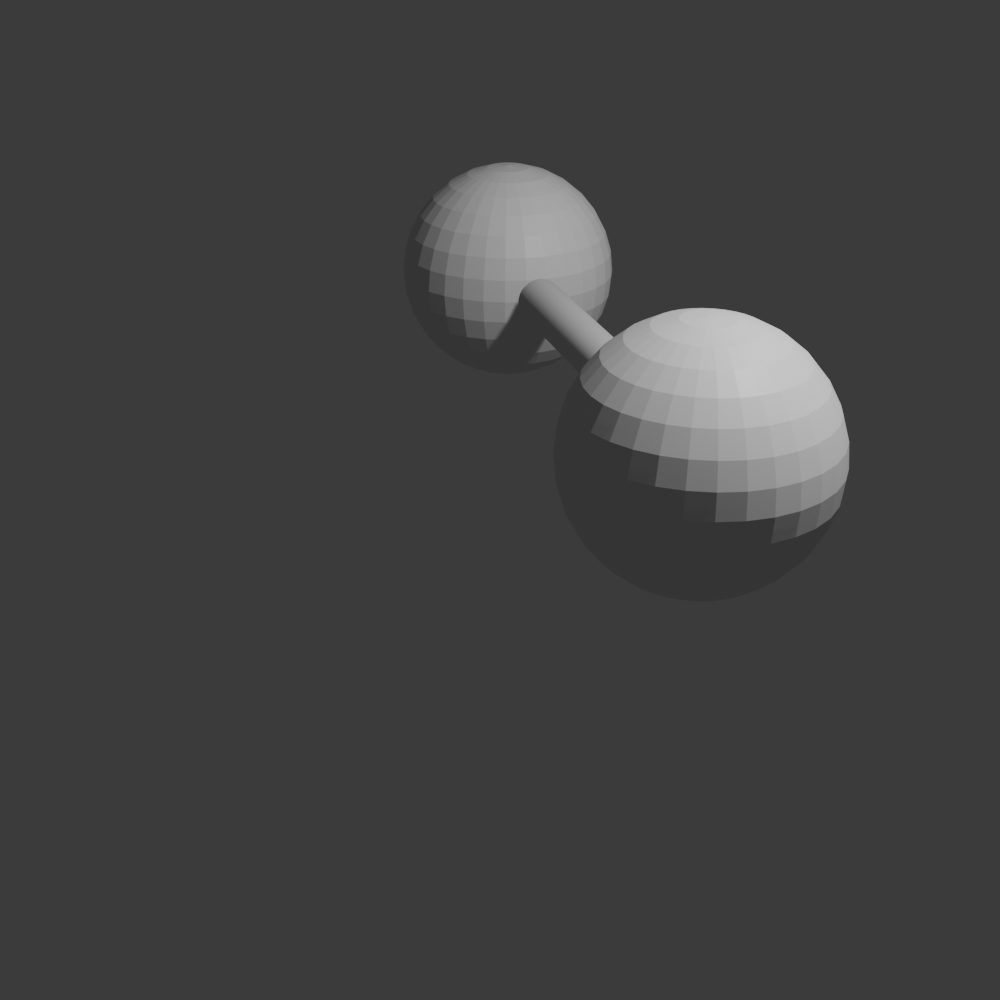

In [3]:
import bpy
from IPython.display import display, Image

import bpy

bpy.ops.object.select_all(action="DESELECT")
bpy.ops.object.select_by_type(type="MESH")
bpy.ops.object.delete()


# Add a sphere at the origin
bpy.ops.mesh.primitive_uv_sphere_add(radius=1, location=(-2, 2, 1))
sphereA = bpy.context.object
sphereA.name = 'SphereA'

# Add another sphere
bpy.ops.mesh.primitive_uv_sphere_add(radius=1, location=(2, 0, 1))
sphereB = bpy.context.object
sphereB.name = 'SphereB'

# Add Suzanne
bpy.ops.mesh.primitive_monkey_add(size=2, location=(0, 0, 0))
suzanne = bpy.context.object
suzanne.name = 'Suzanne'

# Create a new Geometry Nodes modifier for Suzanne
geo_nodes = suzanne.modifiers.new(name="GeometryNodes", type="NODES")
node_group = bpy.data.node_groups.new("GeometryNodes", "GeometryNodeTree")
geo_nodes.node_group = node_group

# Create input and output nodes
outNode = node_group.nodes.new("NodeGroupOutput")
objectInfoNodeA = node_group.nodes.new("GeometryNodeObjectInfo")
objectInfoNodeB = node_group.nodes.new("GeometryNodeObjectInfo")
curveLineNode = node_group.nodes.new("GeometryNodeCurvePrimitiveLine")
curveCircleNode = node_group.nodes.new("GeometryNodeCurvePrimitiveCircle")
curveToMeshNode = node_group.nodes.new("GeometryNodeCurveToMesh")

# Set the objects for the Object Info nodes
objectInfoNodeA.inputs["Object"].default_value = sphereA
objectInfoNodeB.inputs["Object"].default_value = sphereB

# Add the output socket to the node group interface
node_group.interface.new_socket(
    name="Geometry", in_out="OUTPUT", socket_type="NodeSocketGeometry"
)

# Set node locations
objectInfoNodeA.location = (-200, 200)
objectInfoNodeB.location = (-200, -200)
curveLineNode.location = (0, 100)
curveCircleNode.location = (0, -100)
curveToMeshNode.location = (200, 0)
outNode.location = (400, 0)

# Set the radius of the curve circle
curveCircleNode.inputs['Radius'].default_value = 0.2

# Connect the nodes
node_group.links.new(objectInfoNodeA.outputs['Location'], curveLineNode.inputs['Start'])
node_group.links.new(objectInfoNodeB.outputs['Location'], curveLineNode.inputs['End'])
node_group.links.new(curveLineNode.outputs['Curve'], curveToMeshNode.inputs['Curve'])
node_group.links.new(curveCircleNode.outputs['Curve'], curveToMeshNode.inputs['Profile Curve'])
node_group.links.new(curveToMeshNode.outputs['Mesh'], outNode.inputs['Geometry'])

path = "test.png"
bpy.context.scene.render.resolution_x = 1000
bpy.context.scene.render.resolution_y = 1000
bpy.ops.render.render()
bpy.data.images["Render Result"].save_render(filepath=path)
display(Image(filename=path))